In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.spatial.transform import Rotation as R

In [2]:
pelvis = pd.read_csv('David-50-pokus03/Xsens_DOT_2_D422CD006474_20250409_105528.csv', skiprows= 7,  sep=',')
right = pd.read_csv('David-50-pokus03/Xsens_DOT_4_D422CD006380_20250409_105528.csv', skiprows= 7,  sep=',')
left = pd.read_csv('David-50-pokus03/Xsens_DOT_3_D422CD006379_20250409_105528.csv', skiprows= 7,  sep=',')

In [3]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
right['real_ticks'] = right['SampleTimeFine'] - right['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
right['time_s'] = right['real_ticks'] * 1e-6

# Convert seconds to milliseconds
right['time_ms'] = right['time_s'] * 1000
#  show the actual intervals between samples
right['delta_ms'] = right['time_ms'].diff()

In [4]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
left['real_ticks'] = left['SampleTimeFine'] - left['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
left['time_s'] = left['real_ticks'] * 1e-6

# Convert seconds to milliseconds
left['time_ms'] = left['time_s'] * 1000
#  show the actual intervals between samples
left['delta_ms'] = left['time_ms'].diff()

In [5]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
pelvis['real_ticks'] = pelvis['SampleTimeFine'] - pelvis['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
pelvis['time_s'] = pelvis['real_ticks'] * 1e-6

# Convert seconds to milliseconds
pelvis['time_ms'] = pelvis['time_s'] * 1000
#  show the actual intervals between samples
pelvis['delta_ms'] = pelvis['time_ms'].diff()

In [6]:
right[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,714.000000,714.000000
mean,0.364156,5941.785500
std,5.559841,3437.707639
min,-63.281025,0.000000
25%,0.590937,2970.892750
50%,0.712362,5941.785500
75%,0.947206,8912.678250
max,46.472694,11883.571000


In [7]:
left[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,714.000000,714.000000
mean,-0.826694,5941.785500
std,6.375642,3437.707639
min,-91.253006,0.000000
25%,-0.424738,2970.892750
50%,-0.277105,5941.785500
75%,-0.154105,8912.678250
max,61.326710,11883.571000


In [8]:
pelvis[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,714.000000,714.000000
mean,0.763748,5941.785500
std,3.042579,3437.707639
min,-13.076845,0.000000
25%,0.159996,2970.892750
50%,0.247453,5941.785500
75%,0.570146,8912.678250
max,34.256222,11883.571000


<Axes: title={'center': 'Pelvis Acc Z vs Time'}, xlabel='time_ms'>

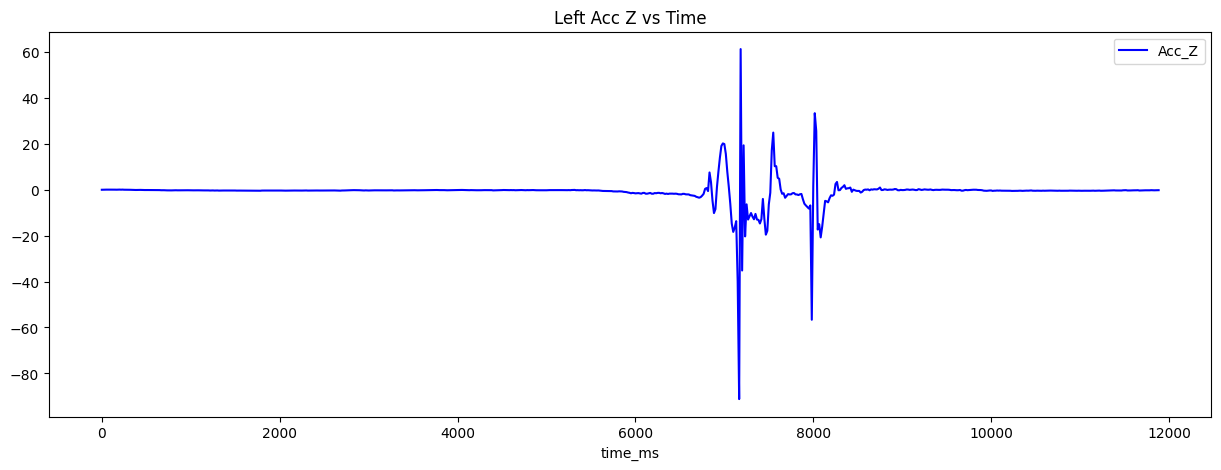

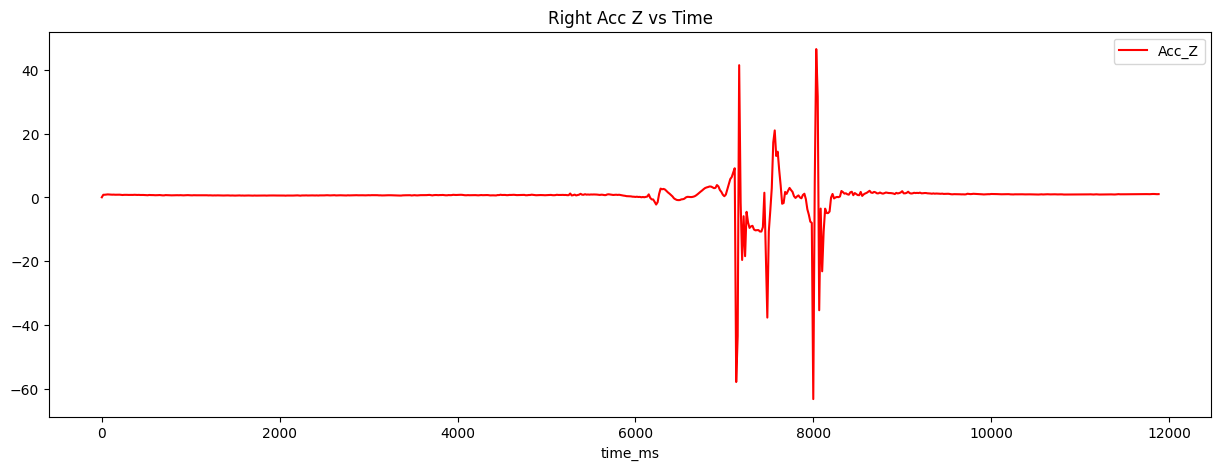

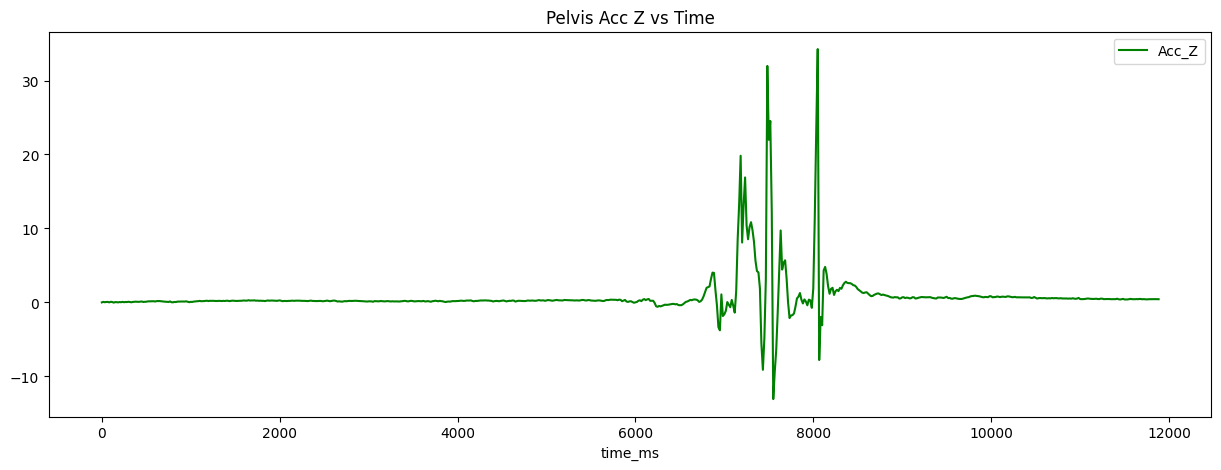

In [9]:
# visualize the data and find the connection between the accelerometer  and times 
left.plot(x='time_ms', y='Acc_Z', title='Left Acc Z vs Time', figsize=(15, 5), color='blue')
right.plot(x='time_ms', y='Acc_Z', title='Right Acc Z vs Time', figsize=(15, 5), color='red')
pelvis.plot(x='time_ms', y='Acc_Z', title='Pelvis Acc Z vs Time', figsize=(15, 5), color='green')

In [10]:
right.describe()

,PacketCounter,SampleTimeFine,Euler_X,Euler_Y,Euler_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,real_ticks,time_s,time_ms,delta_ms
count,714.000000,7.140000e+02,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,7.140000e+02,714.000000,714.000000,7.130000e+02
mean,356.500000,1.989026e+09,14.470454,-84.063730,44.268972,9.498828,0.028429,0.364156,-0.626318,0.142541,-1.345023,5.941786e+06,5.941786,5941.785500,1.666700e+01
std,206.258333,3.437708e+06,54.873312,4.883866,56.677266,6.405285,3.592318,5.559841,62.876434,66.857915,11.666702,3.437708e+06,3.437708,3437.707639,5.521317e-13
min,0.000000,1.983084e+09,-29.266026,-88.852608,-115.869514,-33.743553,-46.050690,-63.281025,-550.402466,-651.506104,-108.301620,0.000000e+00,0.000000,0.000000,1.666700e+01
25%,178.250000,1.986055e+09,-23.516798,-86.654276,26.555295,9.740209,-0.375943,0.590937,-1.082055,-1.118980,-1.788007,2.970893e+06,2.970893,2970.892750,1.666700e+01
50%,356.500000,1.989026e+09,1.430246,-85.943996,53.328899,9.765005,-0.288537,0.712362,0.168135,0.055227,-1.224063,5.941786e+06,5.941785,5941.785500,1.666700e+01
75%,534.750000,1.991997e+09,27.551816,-83.910698,86.370634,9.786796,0.444136,0.947206,0.853649,0.872657,-0.753241,8.912678e+06,8.912678,8912.678250,1.666700e+01
max,713.000000,1.994968e+09,179.793610,-54.491791,92.521164,107.897415,58.620499,46.472694,512.411316,529.608337,58.584023,1.188357e+07,11.883571,11883.571000,1.666700e+01


In [11]:
left.describe()

,PacketCounter,SampleTimeFine,Euler_X,Euler_Y,Euler_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,real_ticks,time_s,time_ms,delta_ms
count,714.000000,7.140000e+02,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,7.140000e+02,714.000000,714.000000,7.130000e+02
mean,356.500000,1.989043e+09,-7.020320,-83.656184,56.178700,9.658570,-0.148607,-0.826694,1.583618,0.336138,0.193615,5.941786e+06,5.941786,5941.785500,1.666700e+01
std,206.258333,3.437708e+06,149.693693,8.917229,138.406261,7.406261,3.495397,6.375642,60.514472,71.926594,13.908211,3.437708e+06,3.437708,3437.707639,5.521317e-13
min,0.000000,1.983101e+09,-179.776337,-89.928673,-179.963699,-25.441307,-25.974348,-91.253006,-823.474365,-644.208008,-79.616760,0.000000e+00,0.000000,0.000000,1.666700e+01
25%,178.250000,1.986072e+09,-121.054996,-88.331238,-106.841541,9.738001,-0.769190,-0.424738,0.006574,-1.863634,-0.221585,2.970893e+06,2.970893,2970.892750,1.666700e+01
50%,356.500000,1.989043e+09,-92.760715,-85.138870,112.515373,9.771263,-0.018772,-0.277105,1.038393,0.241080,0.261288,5.941786e+06,5.941785,5941.785500,1.666700e+01
75%,534.750000,1.992014e+09,163.527695,-84.420256,166.639450,9.788349,0.052245,-0.154105,1.975000,1.254230,0.739119,8.912678e+06,8.912678,8912.678250,1.666700e+01
max,713.000000,1.994984e+09,179.968262,-35.946106,179.969589,109.989250,47.939346,61.326710,437.723694,546.832581,138.902283,1.188357e+07,11.883571,11883.571000,1.666700e+01


In [12]:
pelvis.describe()

,PacketCounter,SampleTimeFine,Euler_X,Euler_Y,Euler_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,real_ticks,time_s,time_ms,delta_ms
count,714.000000,7.140000e+02,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,7.140000e+02,714.000000,714.000000,7.130000e+02
mean,356.500000,1.989026e+09,46.429623,-85.478394,10.259198,9.739455,0.199887,0.763748,0.425578,-0.733716,0.510015,5.941786e+06,5.941786,5941.785500,1.666700e+01
std,206.258333,3.437708e+06,36.627915,4.900430,34.362847,5.643922,1.196129,3.042579,18.025879,40.684617,9.899268,3.437708e+06,3.437708,3437.707639,5.521317e-13
min,0.000000,1.983084e+09,-170.337906,-89.420876,-171.787125,-14.563090,-14.546391,-13.076845,-138.141586,-417.536407,-90.338394,0.000000e+00,0.000000,0.000000,1.666700e+01
25%,178.250000,1.986055e+09,22.479087,-87.685184,-18.494024,9.757200,0.153282,0.159996,-0.759673,-1.824700,0.369274,2.970893e+06,2.970893,2970.892750,1.666700e+01
50%,356.500000,1.989026e+09,43.780277,-87.436543,12.898782,9.795033,0.283555,0.247453,0.577791,-0.786355,0.727817,5.941786e+06,5.941785,5941.785500,1.666700e+01
75%,534.750000,1.991997e+09,77.961895,-85.938038,32.955557,9.833130,0.332219,0.570146,2.017929,0.337300,1.214170,8.912678e+06,8.912678,8912.678250,1.666700e+01
max,713.000000,1.994968e+09,105.796288,-61.427029,87.016045,85.805573,10.974271,34.256222,231.793289,608.342529,74.522598,1.188357e+07,11.883571,11883.571000,1.666700e+01


In [17]:
# Correlation matrix between left columns
left.corr().style.background_gradient(cmap='coolwarm')

,PacketCounter,SampleTimeFine,Euler_X,Euler_Y,Euler_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,real_ticks,time_s,time_ms,delta_ms
PacketCounter,1.000000,1.000000,-0.464637,0.289921,0.274917,-0.003576,-0.084293,-0.039979,0.011232,0.015803,0.023219,1.000000,1.000000,1.000000,-0.084911
SampleTimeFine,1.000000,1.000000,-0.464637,0.289921,0.274917,-0.003576,-0.084293,-0.039979,0.011232,0.015803,0.023219,1.000000,1.000000,1.000000,-0.084911
Euler_X,-0.464637,-0.464637,1.000000,0.139610,-0.548265,0.007341,0.033167,-0.052364,-0.120473,0.008095,-0.044514,-0.464637,-0.464637,-0.464637,0.079027
Euler_Y,0.289921,0.289921,0.139610,1.000000,-0.176950,-0.015436,-0.017427,-0.093919,0.042830,-0.058491,-0.142668,0.289921,0.289921,0.289921,0.014926
Euler_Z,0.274917,0.274917,-0.548265,-0.176950,1.000000,0.117620,-0.084107,-0.022311,0.024290,0.013568,0.132498,0.274917,0.274917,0.274917,-0.052805
Acc_X,-0.003576,-0.003576,0.007341,-0.015436,0.117620,1.000000,-0.196851,-0.022526,0.062180,-0.212281,0.222066,-0.003576,-0.003576,-0.003576,0.025549
Acc_Y,-0.084293,-0.084293,0.033167,-0.017427,-0.084107,-0.196851,1.000000,-0.159846,0.020395,-0.156782,-0.138639,-0.084293,-0.084293,-0.084293,-0.000422
Acc_Z,-0.039979,-0.039979,-0.052364,-0.093919,-0.022311,-0.022526,-0.159846,1.000000,-0.335547,0.078935,-0.349798,-0.039979,-0.039979,-0.039979,0.011439
Gyr_X,0.011232,0.011232,-0.120473,0.042830,0.024290,0.062180,0.020395,-0.335547,1.000000,-0.100387,0.095009,0.011232,0.011232,0.011232,-0.066921
Gyr_Y,0.015803,0.015803,0.008095,-0.058491,0.013568,-0.212281,-0.156782,0.078935,-0.100387,1.000000,0.439131,0.015803,0.015803,0.015803,-0.000604


In [ ]:
# Correlation matrix between right columns
right.corr().style.background_gradient(cmap='coolwarm')

,PacketCounter,SampleTimeFine,Euler_X,Euler_Y,Euler_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,real_ticks,time_s,time_ms,delta_ms
PacketCounter,1.000000,1.000000,0.477233,0.335197,-0.526463,-0.013282,0.091477,-0.009284,-0.001347,0.008409,-0.003528,1.000000,1.000000,1.000000,-0.084911
SampleTimeFine,1.000000,1.000000,0.477233,0.335197,-0.526463,-0.013282,0.091477,-0.009284,-0.001347,0.008409,-0.003528,1.000000,1.000000,1.000000,-0.084911
Euler_X,0.477233,0.477233,1.000000,0.589034,-0.996946,0.098442,0.130005,-0.113885,0.019451,-0.053388,-0.048837,0.477233,0.477233,0.477233,-0.012981
Euler_Y,0.335197,0.335197,0.589034,1.000000,-0.587785,-0.011697,0.209754,-0.230030,0.026315,-0.045698,0.152306,0.335197,0.335197,0.335197,0.001674
Euler_Z,-0.526463,-0.526463,-0.996946,-0.587785,1.000000,-0.082913,-0.119728,0.108818,-0.009148,0.047539,0.043685,-0.526463,-0.526463,-0.526463,0.016432
Acc_X,-0.013282,-0.013282,0.098442,-0.011697,-0.082913,1.000000,0.263175,0.092646,0.087457,-0.062007,-0.253375,-0.013282,-0.013282,-0.013282,0.016997
Acc_Y,0.091477,0.091477,0.130005,0.209754,-0.119728,0.263175,1.000000,0.245788,0.381930,0.151258,-0.225691,0.091477,0.091477,0.091477,-0.058303
Acc_Z,-0.009284,-0.009284,-0.113885,-0.230030,0.108818,0.092646,0.245788,1.000000,0.338684,0.060072,-0.222333,-0.009284,-0.009284,-0.009284,-0.006394
Gyr_X,-0.001347,-0.001347,0.019451,0.026315,-0.009148,0.087457,0.381930,0.338684,1.000000,-0.101929,-0.257873,-0.001347,-0.001347,-0.001347,-0.065225
Gyr_Y,0.008409,0.008409,-0.053388,-0.045698,0.047539,-0.062007,0.151258,0.060072,-0.101929,1.000000,0.194611,0.008409,0.008409,0.008409,-0.025211


In [ ]:
# Correlation matrix between right columns.
pelvis.corr().style.background_gradient(cmap='coolwarm')

,PacketCounter,SampleTimeFine,Euler_X,Euler_Y,Euler_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,real_ticks,time_s,time_ms,delta_ms
PacketCounter,1.000000,1.000000,-0.733767,0.267019,0.724130,0.003598,-0.051464,0.125131,0.012857,-0.016694,-0.005183,1.000000,1.000000,1.000000,-0.084911
SampleTimeFine,1.000000,1.000000,-0.733767,0.267019,0.724130,0.003598,-0.051464,0.125131,0.012857,-0.016694,-0.005183,1.000000,1.000000,1.000000,-0.084911
Euler_X,-0.733767,-0.733767,1.000000,-0.445856,-0.778567,-0.053387,0.180042,-0.174662,-0.002326,0.038350,0.046864,-0.733767,-0.733767,-0.733767,0.026070
Euler_Y,0.267019,0.267019,-0.445856,1.000000,0.493896,0.171708,0.036029,0.432651,-0.131108,0.052832,-0.099829,0.267019,0.267019,0.267019,0.012657
Euler_Z,0.724130,0.724130,-0.778567,0.493896,1.000000,0.007790,-0.036978,0.237400,-0.014165,0.091397,-0.001959,0.724130,0.724130,0.724130,-0.034396
Acc_X,0.003598,0.003598,-0.053387,0.171708,0.007790,1.000000,0.259668,0.413681,-0.173977,-0.171035,0.329036,0.003598,0.003598,0.003598,-0.015825
Acc_Y,-0.051464,-0.051464,0.180042,0.036029,-0.036978,0.259668,1.000000,0.205377,-0.129944,-0.060951,0.265091,-0.051464,-0.051464,-0.051464,-0.032509
Acc_Z,0.125131,0.125131,-0.174662,0.432651,0.237400,0.413681,0.205377,1.000000,-0.185005,0.337887,0.026837,0.125131,0.125131,0.125131,0.002338
Gyr_X,0.012857,0.012857,-0.002326,-0.131108,-0.014165,-0.173977,-0.129944,-0.185005,1.000000,-0.153602,-0.079692,0.012857,0.012857,0.012857,0.029820
Gyr_Y,-0.016694,-0.016694,0.038350,0.052832,0.091397,-0.171035,-0.060951,0.337887,-0.153602,1.000000,0.012513,-0.016694,-0.016694,-0.016694,0.002371
